In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data= pd.merge(study_results, mouse_metadata, how='left', on =['Mouse ID', 'Mouse ID'])
# Display the data table for preview

mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [134]:
mouse_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [135]:
#Unique Mouse IDs
len(mouse_data['Mouse ID'].unique())

mouse_id = mouse_data['Mouse ID']

In [136]:
#Find duplicate timepoints for Mouse ID
mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'], keep = False)].groupby(['Mouse ID', 'Timepoint']).min()

Tumor Volume (mm3)  Metastatic Sites Drug Regimen     Sex  \
Mouse ID Timepoint                                                              
g989     0                   45.000000                 0     Propriva  Female   
         5                   47.570392                 0     Propriva  Female   
         10                  49.880528                 0     Propriva  Female   
         15                  51.325852                 0     Propriva  Female   
         20                  54.657650                 1     Propriva  Female   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                  21          26  
         5                  21          26  
         10                 21          26  
         15                 21          26  
         20                 21          26

In [137]:
#create new dataframe without duplicate ID
cleaned_data = mouse_data.loc[mouse_data['Mouse ID'] != 'g989']

In [138]:
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [139]:
len(cleaned_data['Mouse ID'].unique())

248

In [140]:
drug_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [141]:
drug_regimen = cleaned_data.set_index('Drug Regimen')

group_drug = drug_regimen.groupby(['Drug Regimen']).count()

group_drug

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [142]:
group_drug_mean = drug_regimen.groupby(['Drug Regimen']).mean()



drug_mean = group_drug_mean.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})

In [143]:
group_drug_median = drug_regimen.groupby(['Drug Regimen']).median()



drug_median = group_drug_median.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})

In [144]:
group_drug_std = drug_regimen.groupby(['Drug Regimen']).std()



drug_std = group_drug_std.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})

In [145]:
group_drug_sem = drug_regimen.groupby(['Drug Regimen']).sem()


drug_sem = group_drug_sem.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})



In [146]:
group_drug_var = drug_regimen.groupby(['Drug Regimen']).var()

drug_var = group_drug_var.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})



In [147]:
pd.concat((drug_mean['Mean Tumor Volume'],drug_median["Median Tumor Volume"], drug_var ['Tumor Volume Variance'], drug_std['Tumor Volume Std. Dev.'],drug_sem['Tumor Volume Std. Err.']), axis = 1)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


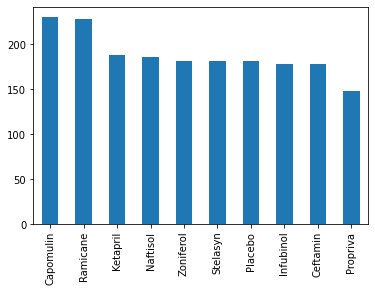

In [148]:
cleaned_data.head()

drugs = cleaned_data['Drug Regimen']

bar_counts = drugs.value_counts()

bar_counts.plot(kind = 'bar')

In [149]:
group_drug

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


<BarContainer object of 10 artists>

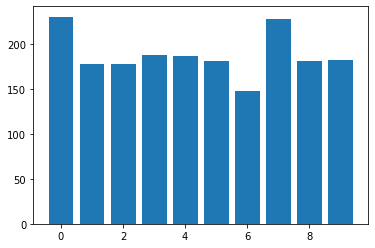

In [150]:
drug_regimen = cleaned_data.set_index('Drug Regimen')

group_drug = drug_regimen.iloc[:, 0].groupby(['Drug Regimen']).count() #Chose any column to reduce it to one array, grouped by drug, count shows rows per drug
plt.bar(np.arange(10), group_drug)
#plt.xticks(np.arange(10),group_drug.index.tolist())



In [151]:
type(group_drug)

pandas.core.series.Series

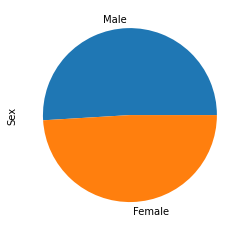

In [152]:
cleaned_data.head()

mice_sex = cleaned_data['Sex']

pie_sex_counts = mice_sex.value_counts()


pie_sex_counts.plot(kind = 'pie')

In [153]:
data_gender = cleaned_data.loc[:, ['Sex','Mouse ID']].groupby('Sex').count().values.reshape(-1)

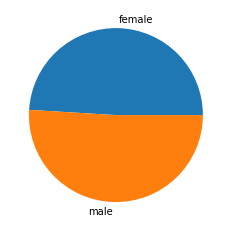

In [154]:
plt.pie(x = data_gender, labels = ['female', 'male'])
plt.show()


In [155]:
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [232]:
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


    
right_side = cleaned_data.loc[cleaned_data.loc[:,'Drug Regimen'].isin(drug_list) ,:].sort_values(by = 'Timepoint').groupby('Mouse ID').last().loc[:, ['Tumor Volume (mm3)', 'Timepoint']].reset_index()

four_drugs = cleaned_data.drop(columns = 'Tumor Volume (mm3)').merge(right_side, on = ['Mouse ID', 'Timepoint'])
            

In [259]:
four_drugs


,Mouse ID,Timepoint,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)
0,u153,0,0,Ceftamin,Female,11,25,45.000000
1,b447,0,0,Ceftamin,Male,2,30,45.000000
2,x226,0,0,Ceftamin,Male,23,28,45.000000
3,t573,0,0,Ceftamin,Female,15,27,45.000000
4,c326,5,0,Infubinol,Female,18,25,36.321346
...,...,...,...,...,...,...,...,...
95,a644,45,1,Ramicane,Female,7,17,32.978522
96,i177,45,3,Ramicane,Male,10,18,33.562402
97,r944,45,2,Capomulin,Male,12,25,41.581521
98,u364,45,3,Capomulin,Male,18,17,31.023923


In [258]:
right_side

,Mouse ID,Tumor Volume (mm3),Timepoint
0,a203,67.973419,45
1,a251,65.525743,45
2,a275,62.999356,45
3,a411,38.407618,45
4,a444,43.047543,45
...,...,...,...
95,y769,68.594745,45
96,y793,31.896238,45
97,y865,64.729837,45
98,z578,30.638696,45


In [158]:
DrugList

{'Capomulin': [45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.85119285,
  45.46224327,
  39.20212894,
  43.180977399999996,
  45.89372032,
  41.40859145,
  45.76088647,
  41.53409702,
  45.70443431,
  38.79647373,
  45.47375302,
  45.83899787,
  42.2616653,
  41.01991315,
  44.02275246,
  45.59706359,
  45.73714484,
  45.78174579,
  43.87849569,
  45.59568527,
  45.64143788,
  45.8956472,
  45.65133131,
  45.83939976,
  45.62238149,
  39.0054935,
  46.56841719,
  39.84822328,
  46.30400254,
  43.68802627,
  46.75907363,
  43.42101414,
  46.414517700000005,
  46.42536551,
  42.99207658,
  44.50204246,
  41.63001026,
  35.6244027,
  36.82536664,
  46.15473721,
  46.54429202,
  43.23196275,
  39.95234669,
  46.74900552,
  37.61494768,
  43.2708519,
  41.99922813,
  39.11389068,
  46.408361299999996,
  46.05960827,
  38.17723195,
  43.7

In [159]:
['Anthony' for i in np.arange(5)] #[<transformation of i> for i in <array>]

['Anthony', 'Anthony', 'Anthony', 'Anthony', 'Anthony']

In [160]:
[DrugList[key] for key in DrugList.keys()]

[[45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.0,
  45.85119285,
  45.46224327,
  39.20212894,
  43.180977399999996,
  45.89372032,
  41.40859145,
  45.76088647,
  41.53409702,
  45.70443431,
  38.79647373,
  45.47375302,
  45.83899787,
  42.2616653,
  41.01991315,
  44.02275246,
  45.59706359,
  45.73714484,
  45.78174579,
  43.87849569,
  45.59568527,
  45.64143788,
  45.8956472,
  45.65133131,
  45.83939976,
  45.62238149,
  39.0054935,
  46.56841719,
  39.84822328,
  46.30400254,
  43.68802627,
  46.75907363,
  43.42101414,
  46.414517700000005,
  46.42536551,
  42.99207658,
  44.50204246,
  41.63001026,
  35.6244027,
  36.82536664,
  46.15473721,
  46.54429202,
  43.23196275,
  39.95234669,
  46.74900552,
  37.61494768,
  43.2708519,
  41.99922813,
  39.11389068,
  46.408361299999996,
  46.05960827,
  38.17723195,
  43.78489343,
  42

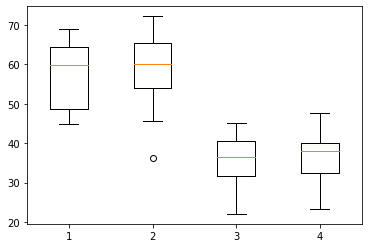

In [227]:
DrugList = {}
for i in four_drugs.loc[:,'Drug Regimen'].unique(): #go through every unique drug regimen
    DrugList[i] = []
    for j in four_drugs.loc[four_drugs.loc[:, 'Drug Regimen'] == i, 'Tumor Volume (mm3)']: #pull every tumor volume FOR that drug
        DrugList[i].append(j)



data = [DrugList[key] for key in DrugList.keys()]

plt.boxplot(data)
plt.show()


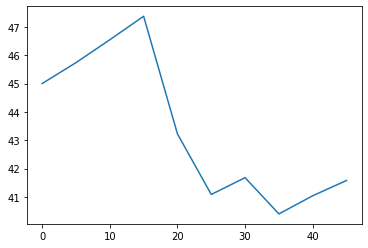

In [294]:
capo_plot = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']

capo_plot2 = cleaned_data.loc[cleaned_data['Mouse ID'] == 'r944']

x = capo_plot2['Tumor Volume (mm3)']
y = capo_plot2['Timepoint']

plt.plot(y, x)

In [311]:
capo_plot

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [ ]:
df.loc[:,:] #everything
df.loc['mouseid123', 'column1'] #indexing using row names and column names
df.iloc[0:5, 2:4] #iloc means index-loc
df.loc[df.mouseweight == "230", :] #filtering based on BOOLEAN conditions
df 

In [299]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df.loc[rows, [columns, columns1], zaxis]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


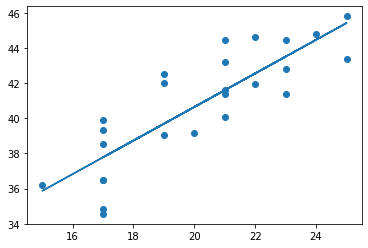

In [363]:
capo_weight = capo_plot.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()

y2= capo_weight['Tumor Volume (mm3)']
x2= capo_weight['Weight (g)']

plt.scatter(x2, y2)

slope = st.linregress(x2, y2).slope
intercept = st.linregress(x2,y2).intercept

plt.plot(x2, slope*x2 + intercept)

In [350]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capo_weight = capo_plot.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()

np.corrcoef(capo_weight.iloc[:,0], capo_weight.iloc[:,1])[0,1]

0.8419363424694717

In [357]:
capo_weight2 = capo_plot.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()


x = capo_plot['Weight (g)']
y = capo_plot['Tumor Volume (mm3)']

st.linregress(x, y)

LinregressResult(slope=0.9609669432428355, intercept=21.489827213299566, rvalue=0.5256995552077169, pvalue=9.605446629501521e-18, stderr=0.10298279892023657)

In [344]:
        weight tumor
weight    1     .84
tumor     .84    1

#ideally when making a regression, you want the predictors to be correlated with the tagret, but NOT correlated between OTHER predictors


array([22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17,
       23, 17, 17, 21, 23, 21, 15, 17])